# Marketing Campaign Analysis: Analyzing the effectiveness and flaws of iFood Marketing Campaign.

Marketing analytics is a powerful tool that enables businesses to make data-driven decisions and gain valuable insights into their customers, market trends, and competitors. By analyzing data from various sources such as customer demographics, purchase history, website traffic, and social media engagement, businesses can optimize their marketing strategies, target the right audience, and measure the effectiveness of their campaigns.

Moreover, marketing analytics can help businesses to identify new opportunities, uncover potential risks, and allocate their resources effectively. It can also provide valuable insights into customer behavior, preferences, and needs, enabling businesses to develop products and services that meet their customers' expectations and increase their satisfaction.

In this notebook, I will be performing a marketing analysis on a fictional food delivery service, ifood, to gather insights and provide data-driven recommendations

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Dataset

The dataset available through the following link https://github.com/nailson/ifood-data-business-analyst-test represents customer data from the Brazillian food delivery service called "iFood" for the span of 2 years. It includes information about customers' demographic details, income, purchasing behavior, spending patterns, and campaign acceptance status.

To provide a comprehensive understanding of the dataset, a meta-data table has been made available as well, which can be accessed through this link: https://github.com/nailson/ifood-data-business-analyst-test/blob/master/dictionary.png.

In [40]:
df_food = pd.read_csv('ifood_df.csv')

### **Objective**

Recent marketing campaigns have not been as effective as they were expected to be causing a purchases and revenue. You need to analyze the data set to understand this problem and propose data-driven solutions.

### Data Cleaning

It appears that there are no null values in the dataset that need to be removed.

In [41]:
df_food.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

### Data Transformation

Each variable's data type has already been correctly designated.

In [42]:
df_food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

### Creating Useful Variables

To add more useful variables to the dataset, I have performed the following steps:

- `Customer ID`, Assigned a unique to each entry.
- `TotalOffspring`, Total kind each customer has, done by adding the values of `Kidhome` and `Teenhome`.
- `HavingChildren`, a binary value indicating whether customer has children or not.
- `Mntallproducts`, representing total amount spent by each customer across all product categories.
- `TotalNumPurchase`, Determined  the total number of purchases made by each customer.
- `TotalAcceptedCampaign`, total accepted campaigns

In [43]:
df_food['CustomerID'] = np.arange(1, len(df_food) + 1)
df_food['TotalOffspring'] = df_food['Kidhome'] + df_food['Teenhome'] 
df_food['HavingChildren'] = df_food['TotalOffspring'].apply(lambda x: 0 if x == 0 else 1)
df_food['Mntallproducts'] = df_food[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df_food['TotalNumPurchase'] = df_food[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df_food['TotalAcceptedCampaign'] = df_food[['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

**Data preview**

In [44]:
df_food.head(5)

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Customer_Days,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,CustomerID,TotalOffspring,HavingChildren,Mntallproducts,TotalNumPurchase,TotalAcceptedCampaign
0,58138.0,0,0,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,63,2822,0,0,1,0,0,0,0,1,0,0,1529,1441,0,1,0,0,1617,25,0
1,46344.0,1,1,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,66,2272,0,0,1,0,0,0,0,1,0,0,21,15,0,2,2,1,27,6,0
2,71613.0,0,0,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,55,2471,0,0,0,1,0,0,0,1,0,0,734,692,0,3,0,0,776,21,0
3,26646.0,1,0,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,36,2298,0,0,0,1,0,0,0,1,0,0,48,43,0,4,1,1,53,8,0
4,58293.0,1,0,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,39,2320,0,1,0,0,0,0,0,0,0,1,407,392,0,5,1,1,422,19,0


## Exploratory Data Analysis

**Distributions of Customer Income, Spendings, and Frequency**

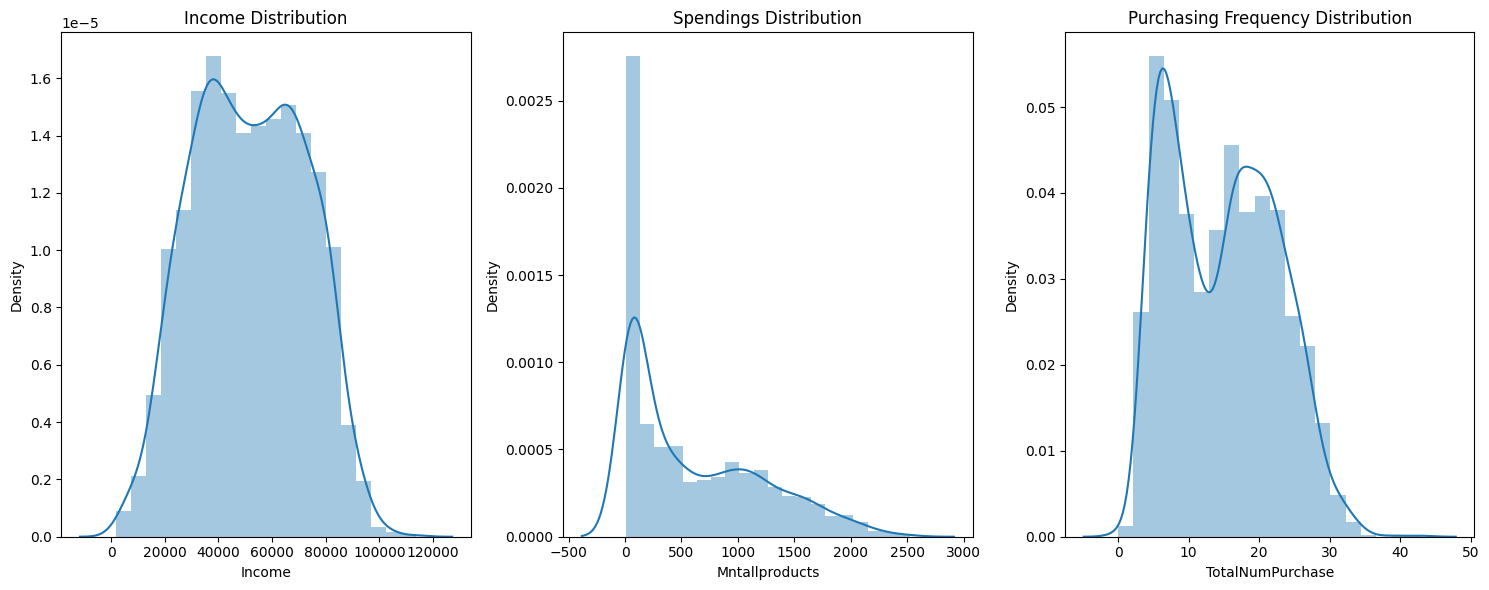

In [45]:
plt.figure(figsize=(15,6))

plt.subplot(1,3,1)
sns.distplot(df_food['Income'], bins=20)
plt.title('Income Distribution')

plt.subplot(1,3,2)
sns.distplot(df_food['Mntallproducts'], bins=20)
plt.title('Spendings Distribution')

plt.subplot(1,3,3)
sns.distplot(df_food['TotalNumPurchase'], bins=20)
plt.title('Purchasing Frequency Distribution')

plt.tight_layout()


**Findings/Implications:**
- Income Distribution show a weak bimodal distribution
- Spending Distribution show a distribution right skewness
- Purchasing Distribution show a bimodal distribution

**Implications**
- For the income distribution, it may be worthwhile to explore further to determine whether there are indeed two distinct groups of customers with different income levels.
- The right-skewed spending distribution suggests that a majority of customers tend to make small purchases, while only a minority of customers are willing to make larger purchases
- The bimodal purchasing distribution suggests that there are two distinct groups of customers: infrequent purchasers and frequent purchasers.


**Which marketing campaign is most successful?**

In [46]:
print('Total Acceptance Rate: {:.2f}%'.format(df_food['TotalAcceptedCampaign'].mean() * 100))

Total Acceptance Rate: 29.93%


<AxesSubplot: >

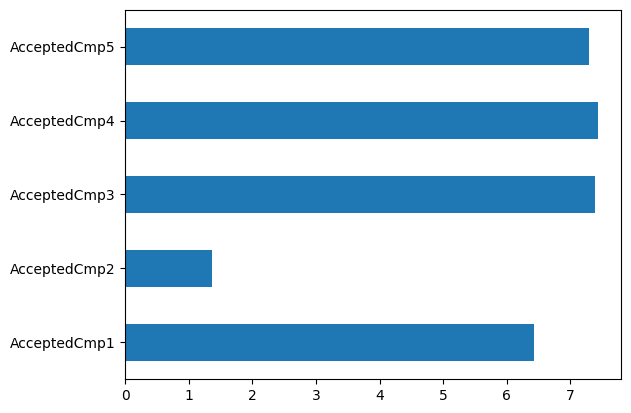

In [47]:
df = df_food[['AcceptedCmp1', 'AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5']].mean() * 100
df.plot(kind='barh')

**Findings:**
- The overall total acceptance rate of all of ifood campaign for the past 2 years is almost 30%
- Looking at each campaign individually, The second campaign had the lowest acceptance rate, while the other campaigns had an acceptance rate of more than 6%.

**Implications**
- The marketing team should analyze the flaws of the second campaign and take steps to rectify and improve upon them. The team can identify areas where it may have fallen short in terms of resonating with the target audience, and develop strategies to address these issues.

**Which product perform the best?**

<AxesSubplot: >

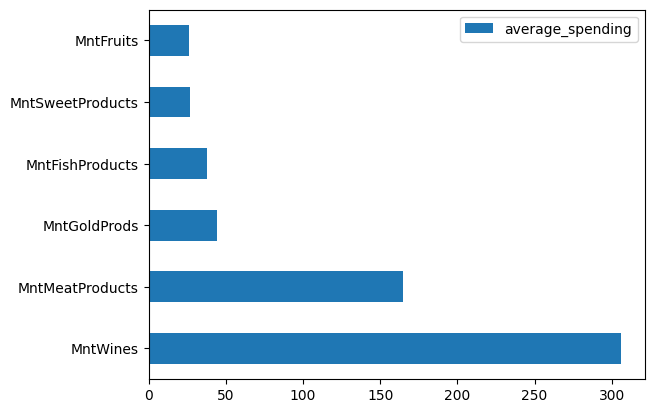

In [48]:
best_product = pd.DataFrame(df_food[['MntWines', 'MntFruits','MntMeatProducts', 'MntFishProducts', 'MntSweetProducts','MntGoldProds']].mean().round()).rename(columns={0:'average_spending'}).sort_values('average_spending',ascending=False)

best_product.plot(kind='barh')

**Findings**
- Customers tend to spend the most on wine products, with meat products ranking as the second highest category in terms of spending. In contrast, the remaining product categories account for less than half of the total amount spent on wine.

**Implications:**
- This finding suggests that wine and meat products are particularly important categories, as they account for a significant portion of customer spending

**Which channels are underperforming?**

<AxesSubplot: >

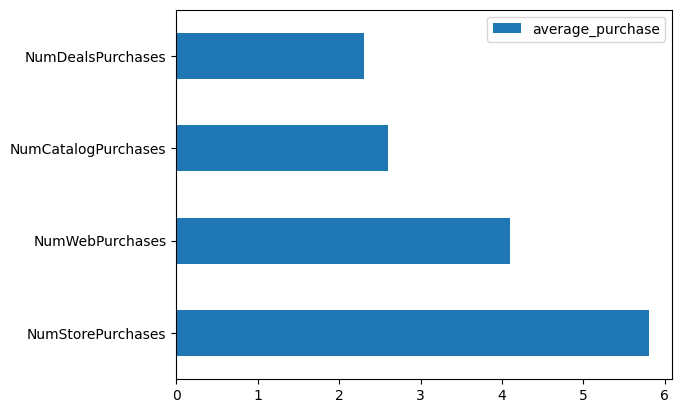

In [49]:
best_channel = pd.DataFrame(df_food[['NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases']].mean().round(1)).rename(columns={0:'average_purchase'}).sort_values('average_purchase',ascending=False)

best_channel.plot(kind='barh')

**Findings:**
- The in-store experience is more appealing to customers than other 3 channels

**Patterns or anomalies in the data**

In order to gain insight into the overall pattern of the data, i will calculate the correlation coefficient for all variables and create a heatmap to visualize the results to quickly identify which variables are positively or negatively correlated and to what extent, which can help us better understand the relationships within the data to guide further analysis.

In [50]:
df_food_corr = df_food.corr()

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5,
        33.5, 34.5, 35.5, 36.5, 37.5, 38.5, 39.5, 40.5, 41.5, 42.5, 43.5,
        44.5]),
 [Text(0, 0.5, 'Income'),
  Text(0, 1.5, 'Kidhome'),
  Text(0, 2.5, 'Teenhome'),
  Text(0, 3.5, 'Recency'),
  Text(0, 4.5, 'MntWines'),
  Text(0, 5.5, 'MntFruits'),
  Text(0, 6.5, 'MntMeatProducts'),
  Text(0, 7.5, 'MntFishProducts'),
  Text(0, 8.5, 'MntSweetProducts'),
  Text(0, 9.5, 'MntGoldProds'),
  Text(0, 10.5, 'NumDealsPurchases'),
  Text(0, 11.5, 'NumWebPurchases'),
  Text(0, 12.5, 'NumCatalogPurchases'),
  Text(0, 13.5, 'NumStorePurchases'),
  Text(0, 14.5, 'NumWebVisitsMonth'),
  Text(0, 15.5, 'AcceptedCmp3'),
  Text(0, 16.5, 'AcceptedCmp4'),
  Text(0, 17.5, 'AcceptedCmp5'),
  Text(0, 18.5, 'AcceptedCmp1'),
  Text(0, 19.5, 'AcceptedCmp2'),
  Text(0, 20.5, 'Complain'),
 

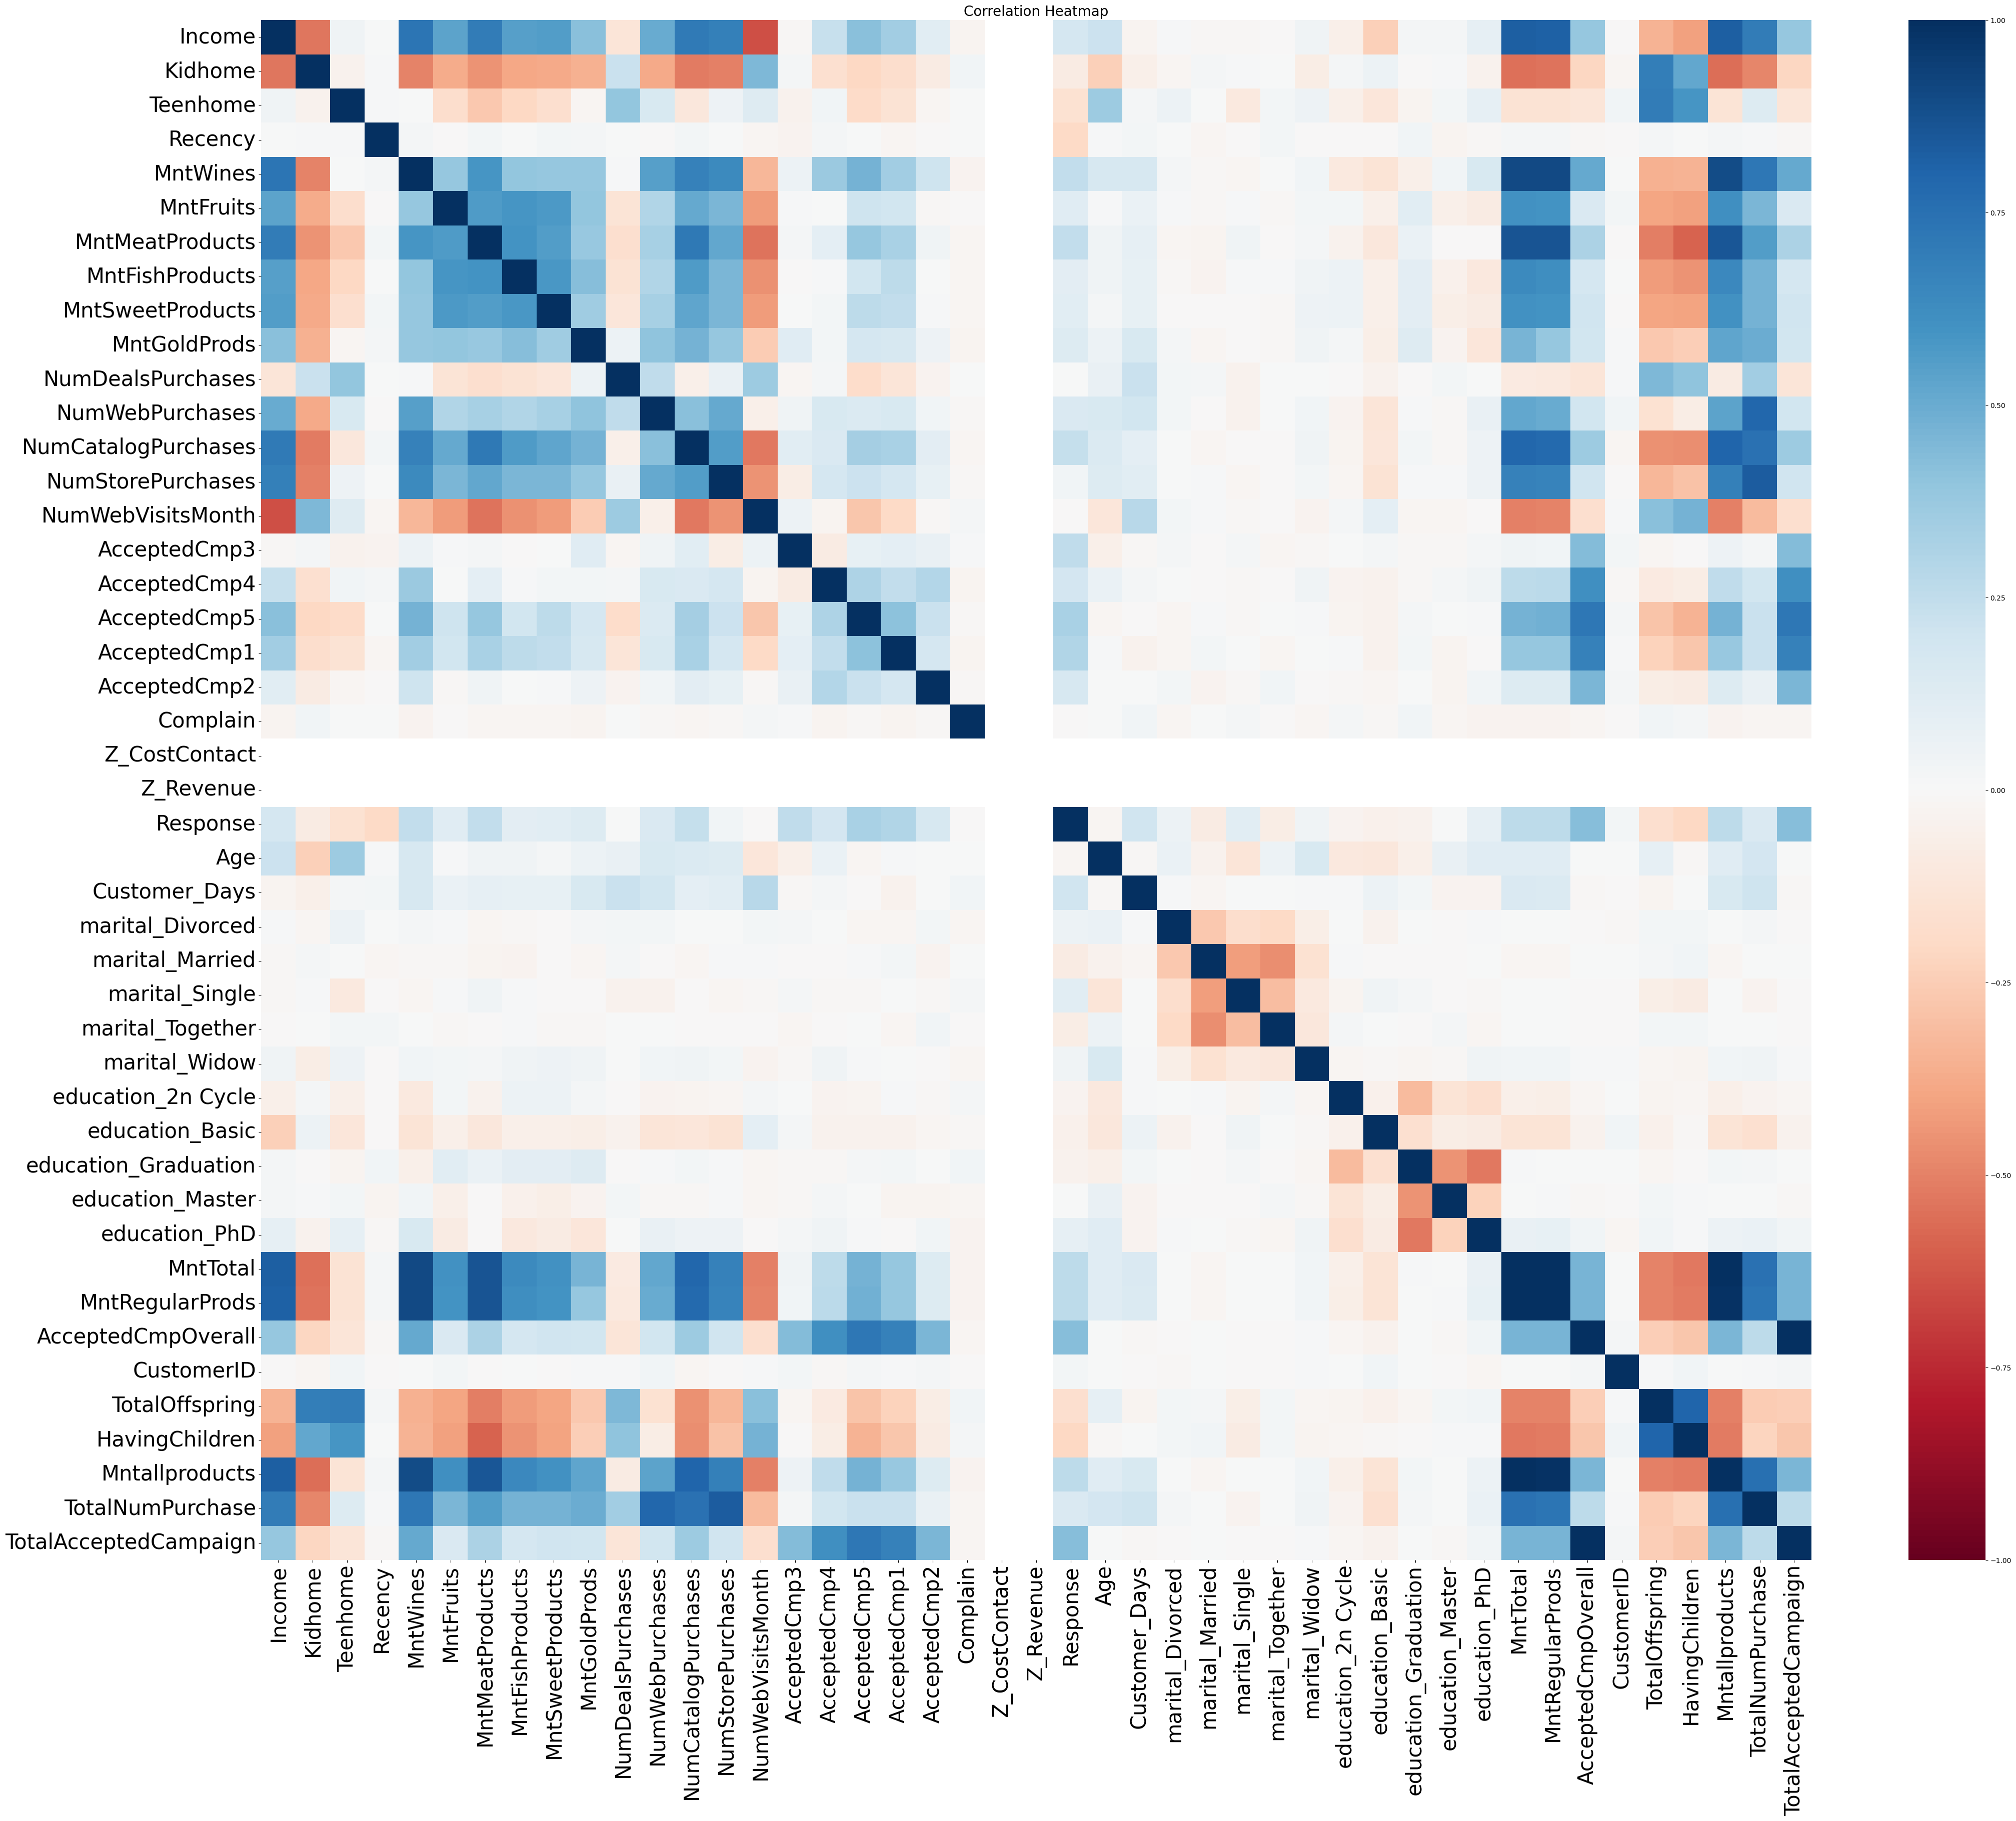

In [51]:
plt.subplots(figsize=(50,40))
sns.heatmap(df_food_corr, cmap='RdBu', vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

**Findings:** Upon analyzing the heatmap, certain variables stand out and provide interesting insights into the behavior amoung customer that are parents:

**Campaign Acceptance**
1. `Overall Campaign Acceptance` is Negatively correlate with `Number of Children`
2. `Overall Campaign Acceptance` is Negatively correlate with `NumDealPurchases` and `NumWebVisitMonth`

**Customer Income**
1. `Income` is Positively correlate to `Total Amount Spent` and`Total Number of purchases`
2. `Income` is Negatively correlate to `Number of Children`

**Customer with Children**
1. `Number of Children` is Negatively correlate with `Income`
2. `Number of Children` is Positively correlate with `Purchases With Deals` and `Website Visits`

**Implications:**
- Customers with children (parents) may be less responsive to recent iFood marketing campaigns.
- As there the are ore children, the less parent spends on the ifood service.
- Parents visit the iFood website more frequently than non-parents and are more likely to make a purchase if there is a special discount.

**Parent vs Non-Parents**

While it is not a definitive conclusion, it is possible that the lack of success in previous campaigns could be due to a failure to customize the campaign to the specific budget and requirements of the parent segment. To investigate this issue further, it would be beneficial to compare the behaviors and preferences of customers with families versus those without families across various variables.

if significant differences are found between the two groups, it could indicate that the current campaign is not effectively targeting or appealing to the parent segment. In such cases, it might be necessary to modify the campaign

**The comparison of the income distributions of parents and non-parents using a box plot**

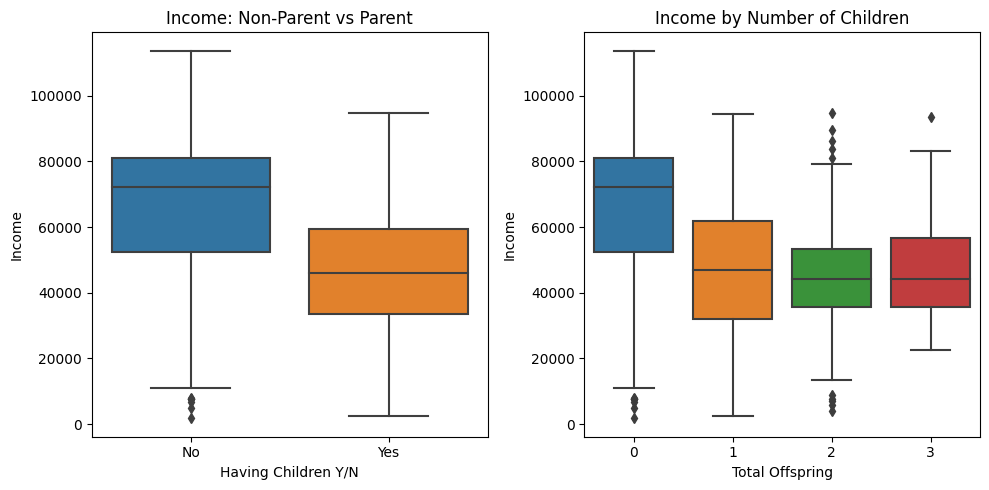

In [63]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x='HavingChildren', y='Income', data=df_food)
plt.title('Income: Non-Parent vs Parent')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.ylabel('Income')
plt.xlabel('Having Children Y/N')

plt.subplot(1,2,2)
sns.boxplot(x='TotalOffspring', y='Income', data=df_food)
plt.title('Income by Number of Children')
plt.ylabel('Income')
plt.xlabel('Total Offspring')

plt.tight_layout()


**Findings**
- The median income of non-parents is higher than the median income of parents.
- The median income decreases as the number of children increases.
- Families with two children have many outliers on both extremes, suggesting that this customer group might have more variation in income levels.

**Implications:**
- There may be a difference in spending behavior between parents and non-parents
- Non-parents may have more disposable income, which could potentially affect their spending habits. 
- On the other hand, parents with more children may have a lower income and therefore need to budget their spending more carefully. This information could be useful for targeted marketing campaigns, as different strategies may need to be employed to effectively reach and engage with these two customer segments.

**Average spending by Parent and Non-Parents**

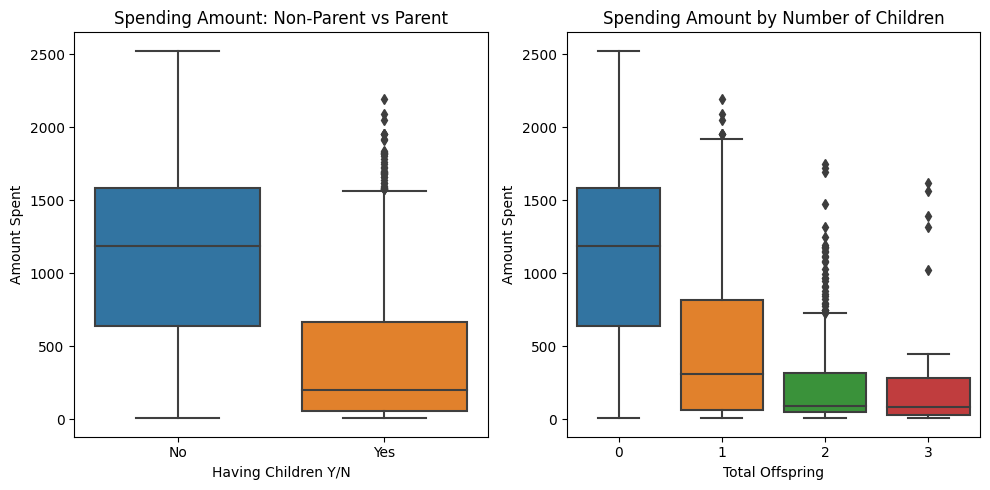

In [62]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.boxplot(x='HavingChildren', y='Mntallproducts', data=df_food)
plt.title('Spending Amount: Non-Parent vs Parent')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.ylabel('Amount Spent')
plt.xlabel('Having Children Y/N')

plt.subplot(1,2,2)
sns.boxplot(x='TotalOffspring', y='Mntallproducts', data=df_food)
plt.title('Spending Amount by Number of Children')
plt.ylabel('Amount Spent')
plt.xlabel('Total Offspring')

plt.tight_layout()

**Findings:**
- The median spending of Non-parent is considerably higher than the spending of parent
- The median spending decreases as the number of children increases. 
- Existence of ourliers in a boxplot of those who has children espacially those who has 2 children.


**Implication**
- Based on the findings, it can be inferred that parents, especially those with more children, tend to spend less than non-parents.
- However, it is worth noting that there are outliers in the spending behavior of parents, particularly those with two children. This suggests that there may be a subset of parents who have higher spending behavior despite having children.

**Campaign acceptance % by Parent and Non-Parents**

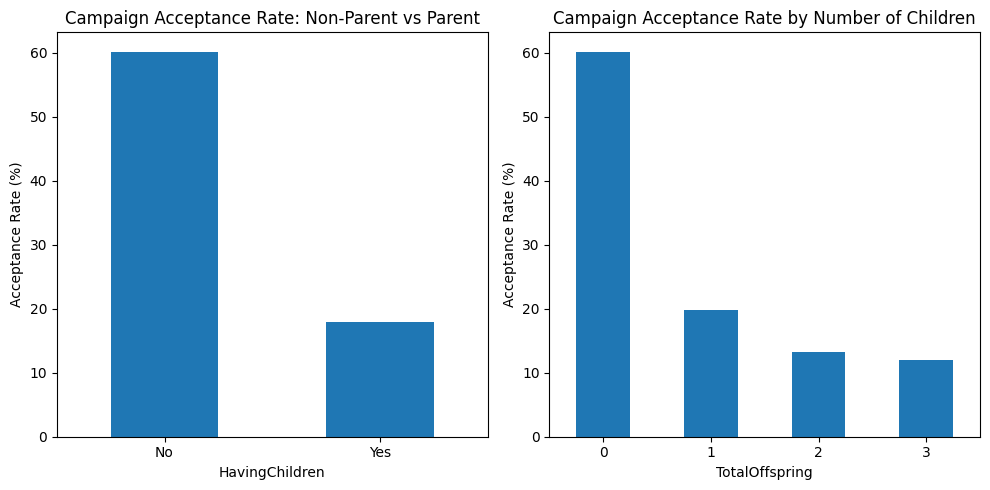

In [61]:
df_cam_accept_child = df_food.groupby('HavingChildren')['AcceptedCmpOverall'].mean() * 100
df_cam_accept_famsize = df_food.groupby('TotalOffspring')['AcceptedCmpOverall'].mean() * 100

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
df_cam_accept_child.plot(kind='bar')
plt.xticks([0,1], ['No', 'Yes'], rotation=0)
plt.title('Campaign Acceptance Rate: Non-Parent vs Parent')
plt.ylabel('Acceptance Rate (%)')

plt.subplot(1,2,2)
df_cam_accept_famsize.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Campaign Acceptance Rate by Number of Children')
plt.ylabel('Acceptance Rate (%)')

plt.tight_layout()

**Findings:**
- Non-Parent has significantly higher campaign acceptance rate than parent
- The campaign acceeptance rate decrease as the number of children increases

**Implication:**
- These findings suggest that the marketing campaign might not be tailored to the needs and preferences of parents, especially those with more children. It is important for the company to consider the needs of this customer segment and develop targeted marketing strategies to improve campaign acceptance rates among parents

**Purchases by Channels, between Non-Parent and Parent**

([<matplotlib.axis.XTick at 0x7f4d9268eb80>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

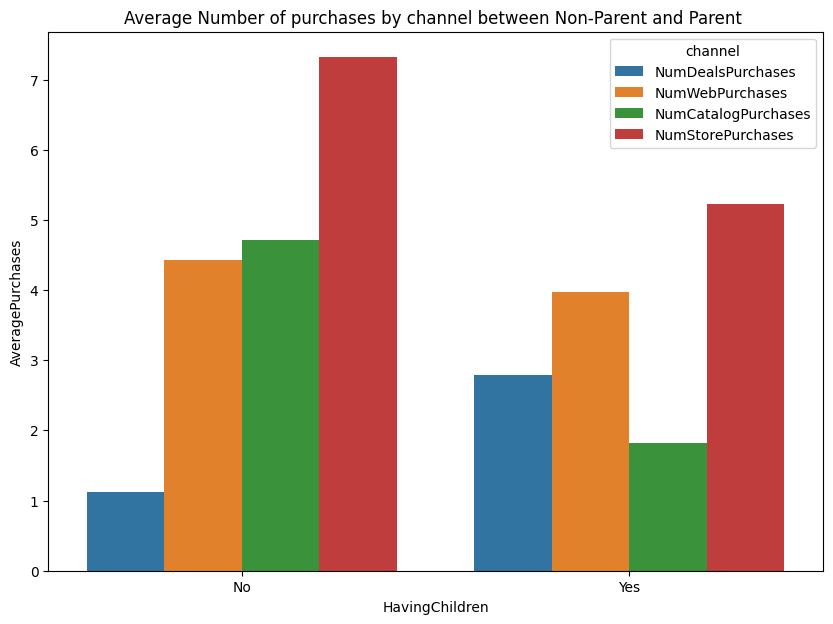

In [114]:
channel_df = df_food.groupby('HavingChildren')['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases'].mean().reset_index()
channel_df = channel_df.melt(id_vars='HavingChildren',var_name='channel', value_name='AveragePurchases')
plt.figure(figsize=(10,7))
sns.barplot(x='HavingChildren', y='AveragePurchases', hue='channel', data=channel_df)
plt.title('Average Number of purchases by channel between Non-Parent and Parent ')
plt.xticks([0,1], ['No', 'Yes'])

**Findings:**
- Parent makes purchases with deal purchases more than Non-Parent.
- Parent makes less Catalog and Store purchases less than Non-Parent.
- Both groups has similar average Website purchases 

**Implications:**
- The findings suggest that there might be a difference in the shopping behavior between parents and non-parents. Parents tend to take advantage of deal purchases more often than non-parents

**Purchases Distribution by Channel by Parent and Non-Parent**

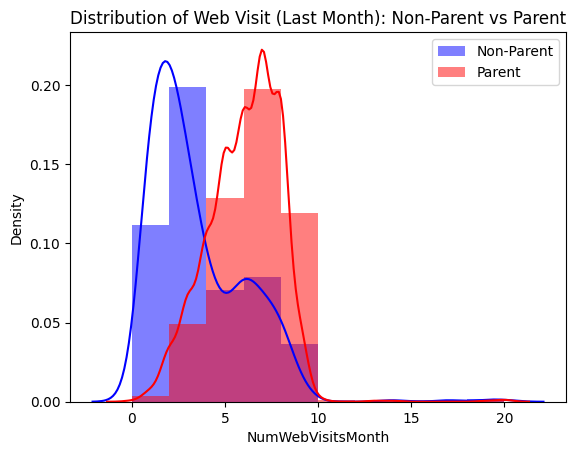

In [82]:
df_webvisit_np = df_food[df_food['HavingChildren'] == 0]['NumWebVisitsMonth']
df_webvisit_p = df_food[df_food['HavingChildren'] == 1]['NumWebVisitsMonth']

sns.distplot(df_webvisit_np, hist=True, color='blue', hist_kws={'alpha':0.5}, label='Non-Parent', bins=10)
sns.distplot(df_webvisit_p, hist=True, color='red', hist_kws={'alpha':0.5}, label='Parent', bins=10)
plt.title('Distribution of Web Visit (Last Month): Non-Parent vs Parent')
plt.legend()

**Findings:**
- Parent tend to visit ifood website more frequently than Non-Parents

**Implication:**
-  iFood should consider targeting their marketing and advertising towards parents, as they seem to be more engaged with the website.This could potentially lead to increased sales and revenue for iFood

### Recommendations

**What we know so far about customers who are parents:**
- They have lower income than non-parents, and this difference becomes more significant with more children in the household.
- They spend less compared to non-parents, and this difference also increases with more children in the household.
- Their marketing acceptance rate from recent campaigns is low, and this rate decreases as they have more children.
- They visit the website more often but have a similar number of web purchases as non-parents.
- They make more purchases in the special deal channel compared to non-parents.

**It is recommended that iFood create a separate marketing campaign specifically targeted towards parents with children.**

This campaign should take into consideration the specific needs and preferences of parent customer segment, such as their tendency to make purchases with deal promotions and their lower spending on catalog and store purchases. The campaign should also be tailored to the income levels and household sizes of parents with children, as these factors may affect their purchasing decisions.

To better target the parent segment, the iFood marketing campaign should focus on showcasing the cost-saving benefits of using iFood for families with children, as well as highlighting the convenience of the service for busy parents. One effective strategy would be to introduce a range of discounted, family-sized meals that offer an affordable solution for feeding the entire family. These meals should be promoted as a one-stop-shop for providing an economical meal for the whole family.

Since parents tend to visit the iFood website more frequently than other segments to acquire meal information, iFood should take advantage of this stage of the customer experience by emphasizing the appeal of a special family deal with the convenience of ordering food with just a click of a button via the website to encourage purchases.

To further incentivize parents with children to use iFood, exclusive deals and promotions should be offered, such as free delivery for orders over a certain amount or discounts on repeat orders. This would encourage them to continue using iFood for their meal needs and promote more purchases in the special deal channel.

However, to achieve such goal, iFood could also consider conducting a another customer survey to better understand their preferences and requirements. This information could be used to tailor marketing campaigns and promotions to better meet the needs of this customer segment. Incentivizing parents to participate in the survey, such as by offering a discount on their next order, could help to increase response rates.